### Mass Growth Rate Statistics

In [1]:
import haccytools.mergertrees.visualization
import pickle
import numpy as np
import pandas as pd
import astropy.units as u
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.pyplot import cm
from matplotlib.lines import Line2D
from astropy.cosmology import FlatLambdaCDM
from itertools import groupby
from matplotlib.ticker import ScalarFormatter
%load_ext line_profiler
%reload_ext autoreload
%autoreload 1
%aimport help_func

pyfftw not available, using numpy fft


In [2]:
#forest_table = pd.read_hdf("/data/a/cpac/mbuehlmann/LJSV/forest_table.hdf5", key='table')
#with open("/data/a/cpac/mbuehlmann/LJSV/progenitor_idx.pkl", "rb") as f:
#    progenitor_idx = pickle.load(f)
forest_table = pd.read_hdf('/data/a/cpac/aurora/reducedtrees.h5', 'ft')
with open("/data/a/cpac/xinliu/reducedtrees/progenitor_idx0.txt") as f:
    progenitor_idx = [[int(p) for p in s.strip().split(" ")] if s.strip() != "" else [] for s in f]

In [3]:
n = 10
snap = 100
thresholds = [5*10**11]
thresholds_are_absolute = True
xaxis = 'z_nums'
small_bins = [10**11.5, 10**12.5, 10**13.5, 10**14.5]
large_bins = [10**9.5, 10**10.5, 10**11.5, 10**12.5, 10**13.5, 10**14.5]
large_bins2 = [10**12, 10**12.5, 10**13, 10**13.5, 10**14, 10**14.5]
rangel_bins = [1*10**11, 1.5*10**11, 2.3*10**11, 3.5*10**11, 5.3*10**11, 8.1*10**11, 1.2*10**12, 1.9*10**12, 2.8*10**12, 4.3*10**12, 6.6*10**12, 1*10**13]
rangel_bins2 = np.concatenate(([rangel_bins[0] - 0.25*10**11], [(rangel_bins[i] + rangel_bins[i+1]) / 2 for i in np.arange(len(rangel_bins) -1)], [rangel_bins[-1] + 3.4*10**13]), axis = 0)
norm_tf = True
avg_tf = True
# Convert snapshots to redshifts
redshifts = np.flip(np.array([10.044, 9.8065, 9.5789, 9.3608, 9.1515, 8.7573, 8.5714, 8.3925, 8.0541, 7.8938, 7.7391, 7.4454, 7.3058, 7.04, 6.9134, 6.6718, 6.5564, 6.3358, 6.1277, 6.028, 5.8367, 5.6556, 5.4839, 5.3208, 5.2422, 5.0909, 4.9467, 4.7429, 4.6145, 4.4918, 4.3743, 4.2618, 4.1015, 4.00, 3.8551, 3.763, 3.6313, 3.5475, 3.4273, 3.3133, 3.205, 3.102, 3.0361, 2.9412, 2.8506, 2.7361, 2.6545, 2.5765, 2.4775, 2.4068, 2.3168, 2.2524, 2.1703, 2.0923, 2.018, 1.9472, 1.8797, 1.7994, 1.7384, 1.68, 1.6104, 1.5443, 1.4938, 1.4334, 1.3759, 1.321, 1.2584, 1.2088, 1.152, 1.1069, 1.0552, 1.006, 0.9591, 0.9143, 0.8646, 0.824, 0.7788, 0.7358, 0.6948, 0.6557, 0.6184, 0.5777, 0.5391, 0.5022, 0.4714, 0.4337, 0.4017, 0.3636, 0.3347, 0.3035, 0.2705, 0.2423, 0.2123, 0.1837, 0.1538, 0.1279, 0.1008, 0.0749, 0.0502, 0.0245, 0.00]))
forest_masses = np.array(forest_table['mass'])
forest_snapnums = np.array(forest_table['snap_num'])
thresholds = [1/10, 0.3]

#### 3a) Distribution of mass growth rate: halos in a single range (no bins)

In [9]:
# Find some halos in a range
range1 = [10**13, 10**14]
halo_idx = help_func.find_halos(forest_table, snap, mass_range = range1)

In [10]:
len(halo_idx)

0

In [7]:
# Track their evolution
time_nums, masses, main_prog_list, major_mergers, major_merger_times, LMMs, LMM_times, fossil_groups = help_func.track_evol(halo_idx, redshifts, progenitor_idx, forest_masses, forest_snapnums, thresholds, x_axis = 'z_nums')

0
<class 'numpy.ndarray'>


TypeError: only size-1 arrays can be converted to Python scalars

In [ ]:
len(main_prog_list)

In [ ]:
# Calculate the alphas
alphas = help_func.calc_mass_growth_rate(timesteps, masses, main_prog_list, progenitor_idx, forest_table)

No handles with labels found to put in legend.


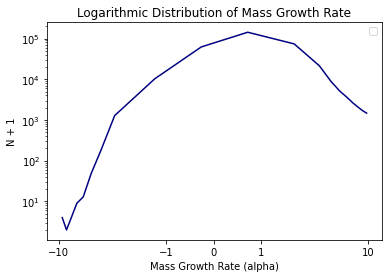

In [51]:
# Plot them
a = help_func.plot_distrib([alphas], "Mass Growth Rate", r"$\alpha$", n_hist_bins = 20, zoom = True, log = True)

#### List comprehension way

In [ ]:
# Plot them
a = help_func.plot_distrib([alphas], "Mass Growth Rate", "alpha", n_hist_bins = 20, zoom = True, log = True)

#### 3b) Distribution of mass growth rate: binned halos

In [ ]:
# Find some halos and put them in bins
binned_halo_idx = help_func.bin_halos(forest_table, snap, large_bins2)
# Track their evolution
binned_timesteps, binned_masses, binned_main_prog_list, binned_lms, binned_lm_times, binned_LLMs, binned_LLM_times, binned_fossil_groups = help_func.track_evol_binned(binned_halo_idx, large_bins2, redshifts, progenitor_idx, forest_masses, forest_snap_nums, thresholds, x_axis = 'z_nums')
# Calculate the alphas
binned_alphas = help_func.calc_BINNED_mass_growth_rate(binned_timesteps, binned_masses, binned_main_prog_list)
# Plot them
large_bin_labels = [r"$[10^{12}, 10^{12.5}]$ $h^{-1}M\odot$", r"$[10^{12.5}, 10^{13}]$ $h^{-1}M\odot$", r"$[10^{13}, 10^{13.5}]$ $h^{-1}M\odot$", r"$[10^{13.5}, 10^{14}]$ $h^{-1}M\odot$", r"$[10^{14.5}, 10^{15}]$ $h^{-1}M\odot$"]
fig, ax = help_func.plot_mass_growth_rates(binned_alphas, "Mass Growth Rate", large_bins2, bin_labels = large_bin_labels, n_hist_bins = 30, zoom = True, log = True)
fig.tight_layout()
fig.savefig("mass_growth_rates.pdf", bbox_inches='tight', pad_inches=0)

In [5]:
# Find some halos and put them in bins
binned_halo_idx = help_func.bin_halos(forest_table, snap, large_bins2)

In [6]:
# Track their evolution
binned_timesteps, binned_masses, binned_main_prog_list, binned_lms, binned_lm_times, binned_LLMs, binned_LLM_times, binned_fossil_groups = help_func.track_evol_binned(binned_halo_idx, large_bins2, redshifts, progenitor_idx, forest_masses, forest_snap_nums, thresholds, x_axis = 'z_nums')

In [7]:
# Calculate the alphas
binned_alphas = help_func.calc_BINNED_mass_growth_rate(binned_timesteps, binned_masses, binned_main_prog_list)

In [40]:
large_bins2

[1000000000000,
 3162277660168.3794,
 10000000000000,
 31622776601683.793,
 100000000000000,
 316227766016837.94]

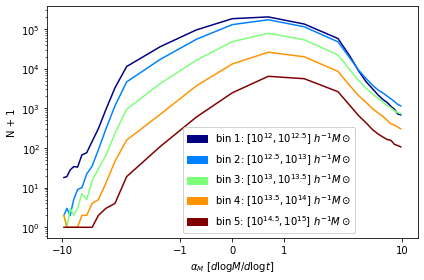

In [12]:
# Plot them
large_bin_labels = [r"$[10^{12}, 10^{12.5}]$ $h^{-1}M\odot$", r"$[10^{12.5}, 10^{13}]$ $h^{-1}M\odot$", r"$[10^{13}, 10^{13.5}]$ $h^{-1}M\odot$", r"$[10^{13.5}, 10^{14}]$ $h^{-1}M\odot$", r"$[10^{14.5}, 10^{15}]$ $h^{-1}M\odot$"]
fig, ax = help_func.plot_mass_growth_rates(binned_alphas, "Mass Growth Rate", large_bins2, bin_labels = large_bin_labels, n_hist_bins = 30, zoom = True, log = True)
fig.tight_layout()
fig.savefig("mass_growth_rates.pdf", bbox_inches='tight', pad_inches=0)

### Check whether all bins have the same histogram bins

#### Sanity Check

Is the number of entries in each bin correct? Number of alphas should be `(# trees per bin) * (length of main progenitor branch - 1)`

In [69]:
bin_counts = []
for i in range(len(bin_main_prog_list)):
    count = 0
    for j in range(len(bin_main_prog_list[i])):
        count = count + (len(bin_main_prog_list[i][j]) - 1)
    bin_counts.append(count)
print(bin_counts)        

[778705, 604991, 259930, 87210, 22544]
